In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import myplotlib as my

In [2]:
# Set matplotlib defaults
matplotlib = my.utilities.set_mpl_defaults(matplotlib)

# Make some data

In [3]:
np.random.seed(11)
variables = ["a", "b", "c", "d", "e", "f", "g", "h"]
data = pd.DataFrame(
    {
        v: np.random.normal(
            loc=np.random.uniform(), scale=np.random.uniform(0.5, 1.0), size=50
        )
        for v in variables
    }
)
data.columns.name = "Group"

# Plots

## Histogram

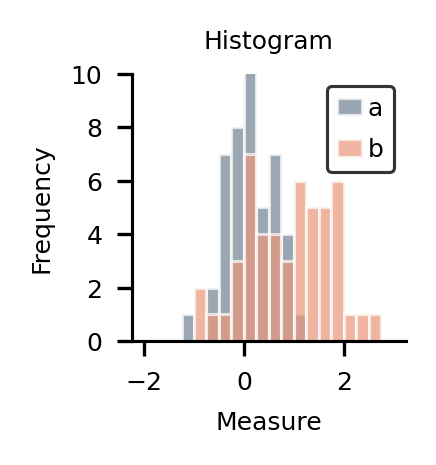

In [4]:
bins = np.linspace(-2, 3, 21)
fig, ax = plt.subplots(dpi=300, figsize=my.utilities.cm2inch(3, 3))

ax = my.plots.hist(data["a"], ax=ax, bins=bins, alpha=0.7, label="a")
ax = my.plots.hist(data["b"], ax=ax, bins=bins, alpha=0.7, label="b")
ax.legend()
ax.set_xlabel("Measure")
ax.set_ylabel("Frequency")
ax.set_ylim(0, 10)
ax.set_title("Histogram")
plt.savefig("examples/histogram.png", bbox_inches="tight")

## Violin Plot

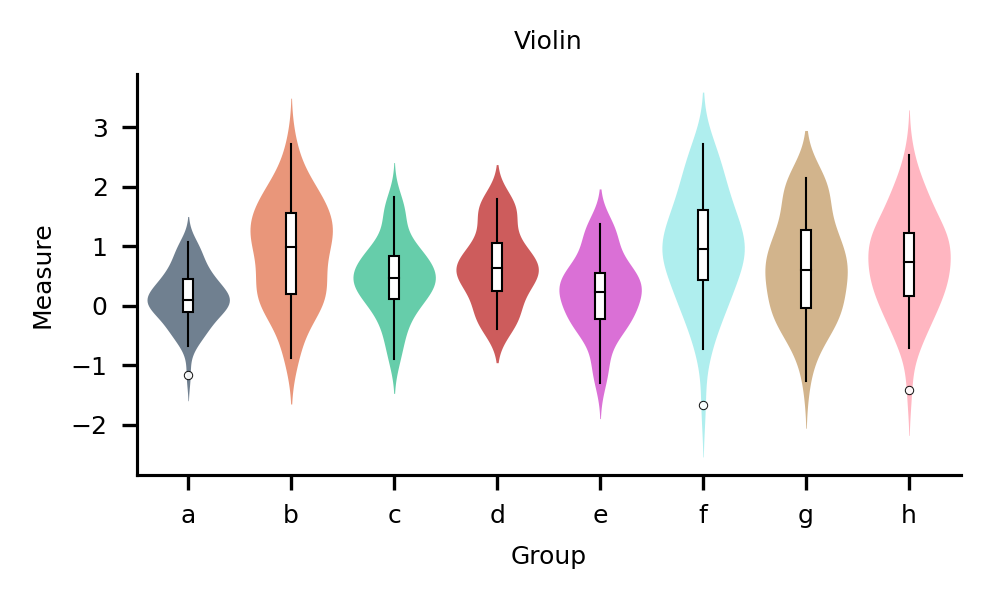

In [5]:
fig, ax = plt.subplots(dpi=300, figsize=my.utilities.cm2inch(9, 4.5))
ax = my.plots.violin(data, value_name="Measure", ax=ax)
ax.set_title("Violin")
plt.savefig("examples/violin.png", bbox_inches="tight")

## Scatter

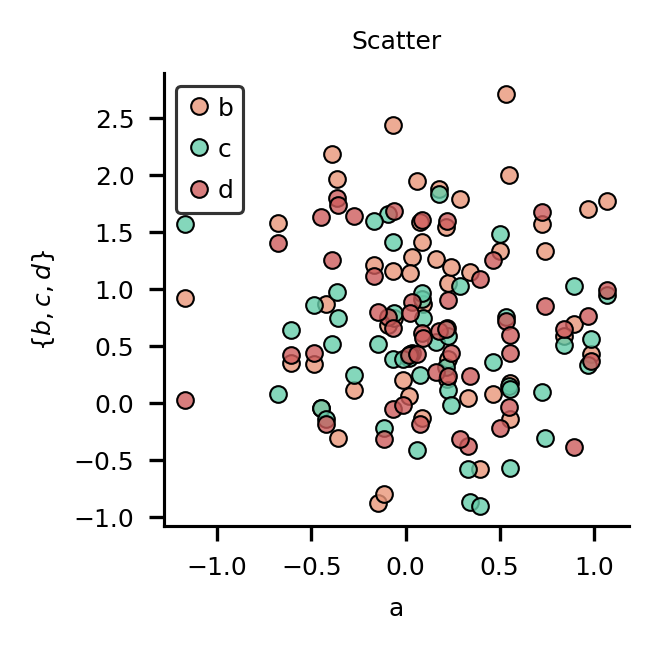

In [6]:
fig = plt.figure()
plt.plot([])  # skip first color, so that variables always have the same color
my.plots.scatter(data["a"], data["b"], label="b")
my.plots.scatter(data["a"], data["c"], label="c")
ax = my.plots.scatter(data["a"], data["d"], label="d")
ax.set_xlabel("a")
ax.set_ylabel("$\{b, c, d\}$")
ax.legend()
ax.set_title("Scatter")
plt.savefig("examples/scatter.png", bbox_inches="tight")

## Linear model

<function scatter at 0x7f950dd05a60>


/Users/moltaire/Desktop/myplotlib/myplotlib/plots/lm.py:51: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 19 seconds.
/Users/moltaire/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<function scatter at 0x7f950dd05a60>


/Users/moltaire/Desktop/myplotlib/myplotlib/plots/lm.py:51: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 14 seconds.
/Users/moltaire/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


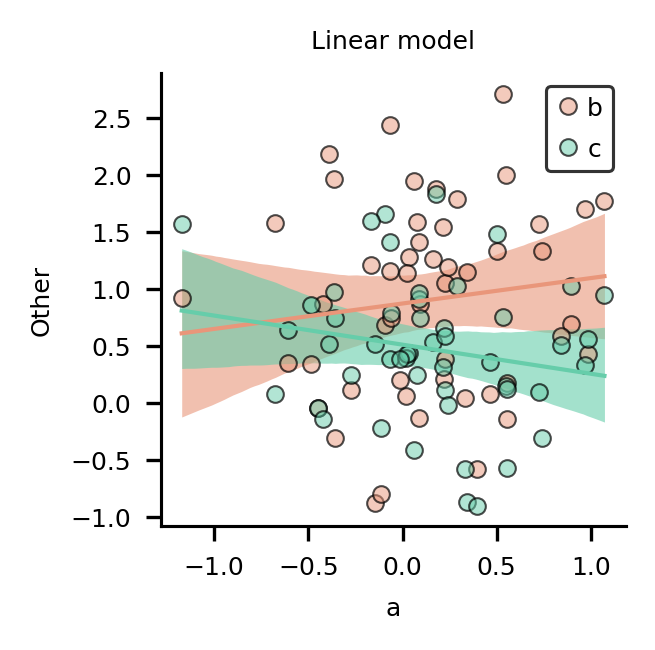

In [7]:
scatter_kws = dict(edgealpha=0.7, facealpha=0.5)
fig, ax = plt.subplots()
plt.plot([])  # skip first color again
ax, trace_ab, summary_ab = my.plots.lm(
    data["a"], data["b"], scatter_kws=dict(scatter_kws, label="b")
)
ax, trace_ac, summary_ac = my.plots.lm(
    data["a"], data["c"], scatter_kws=dict(scatter_kws, label="c")
)
ax.legend()
ax.set_xlabel("a")
ax.set_ylabel("Other")

ax.set_title("Linear model")
plt.savefig("examples/lm.png", bbox_inches="tight")

## Factorial Heatmap

For this plot, we need to make a different dataset first:

In [8]:
import itertools


def product_dict(**kwargs):
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))


np.random.seed(1)
df = pd.DataFrame(
    list(
        product_dict(
            x0=[0, 1, 2], x1=[0, 1], x2=[0, 1, 2], x3=[0, 1, 2], x4=[0, 1], x5=[0, 1, 2]
        )
    )
)
betas = np.random.normal(size=6)
df["y"] = df[["x0", "x1", "x2", "x3", "x4", "x5"]].values.dot(betas)
df.head()

,x0,x1,x2,x3,x4,x5,y
0,0,0,0,0,0,0,0.000000
1,0,0,0,0,0,1,-2.301539
2,0,0,0,0,0,2,-4.603077
3,0,0,0,0,1,0,0.865408
4,0,0,0,0,1,1,-1.436131


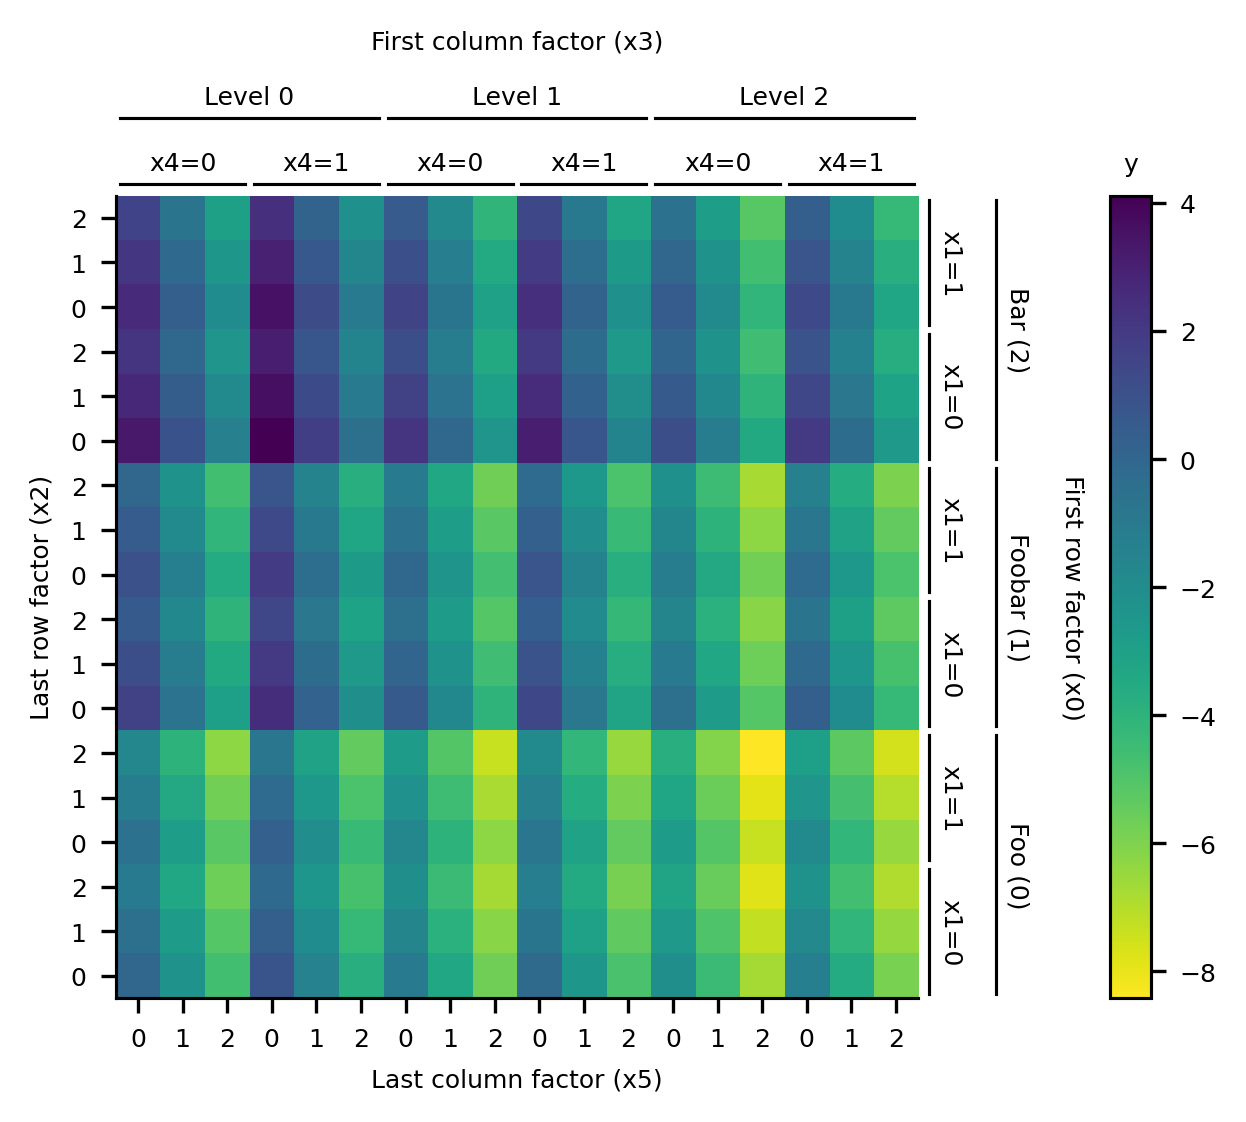

In [9]:
fig, ax = plt.subplots(figsize=my.utilities.cm2inch(14, 9), dpi=300)
ax = my.plots.factorial_heatmap(
    df,
    row_factors=["x0", "x1", "x2"],
    col_factors=["x3", "x4", "x5"],
    value_var="y",
    factor_labels={"x2": "Last row factor (x2)", "x5": "Last column factor (x5)"},
    level_labels={
        "x0": {0: "Foo (0)", 1: "First row factor (x0)\n\nFoobar (1)", 2: "Bar (2)"},
        "x3": {0: "Level 0", 1: "First column factor (x3)\n\nLevel 1", 2: "Level 2"},
    },
)
plt.savefig("examples/factorial_heatmap.png", bbox_inches="tight")

## Model recovery plot

In [10]:
np.random.seed(1)
n_models = 5
model_labels = [f"Model {m}" for m in range(n_models)]

# Simulate model posterior probabilities
mpp = np.random.uniform(size=(n_models, n_models)) ** 3
mpp = (mpp / mpp.sum(axis=1)[:, np.newaxis]).round(2)

# Simulate random model exceedance probabilities
xp = mpp ** 5
xp = (xp / xp.sum(axis=1)[:, np.newaxis]).round(2)

mpp, xp

(array([[0.15, 0.78, 0.  , 0.06, 0.01],
        [0.  , 0.02, 0.15, 0.23, 0.58],
        [0.07, 0.3 , 0.01, 0.63, 0.  ],
        [0.54, 0.13, 0.31, 0.  , 0.01],
        [0.21, 0.37, 0.01, 0.14, 0.27]]),
 array([[0.  , 1.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.01, 0.99],
        [0.  , 0.02, 0.  , 0.98, 0.  ],
        [0.94, 0.  , 0.06, 0.  , 0.  ],
        [0.05, 0.79, 0.  , 0.01, 0.16]]))

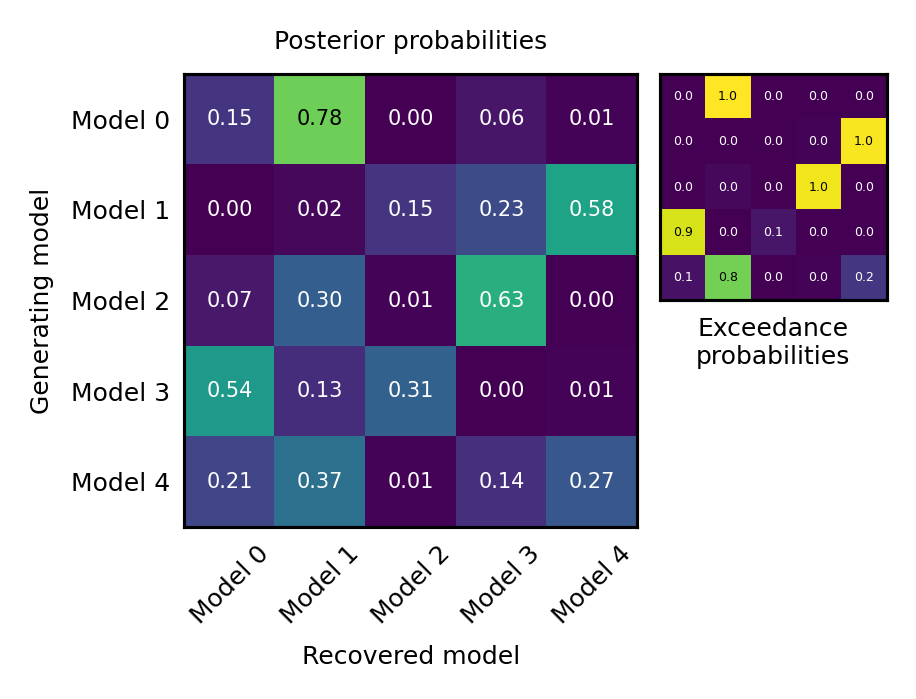

In [11]:
ax = my.plots.model_recovery(
    mpp=mpp, xp=xp, model_labels=model_labels, round_inset_values=1, inset_aspect=1
)
plt.savefig("examples/model_recovery.png", bbox_inches="tight")

# Utilities
## Bar annotation

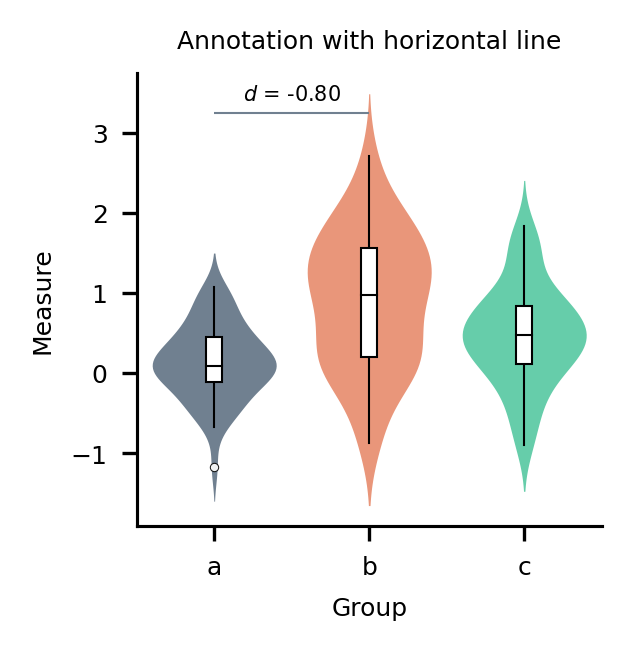

In [12]:
ax = my.plots.violin(data[["a", "b", "c"]], value_name="Measure")

# Annotation
sd_pooled = np.sqrt(np.std(data["a"]) ** 2 + np.std(data["b"]) ** 2)
d = (np.mean(data["a"]) - np.mean(data["b"])) / sd_pooled
ax = my.annotation.hTextLine(
    text="$d$ = {d:.2f}".format(d=d), x0=0, x1=1, y=3.25, ax=ax
)
ax.set_title("Annotation with horizontal line")
plt.savefig("examples/hTextLine.png", bbox_inches="tight")

## Axis labelling

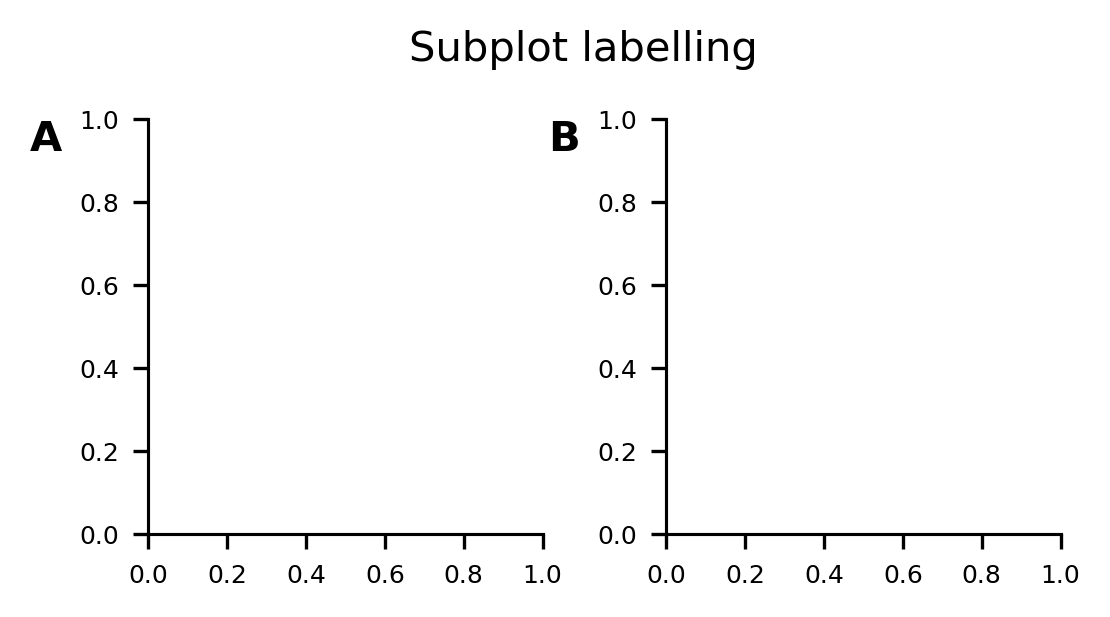

In [13]:
fig, axs = plt.subplots(1, 2, figsize=my.utilities.cm2inch(9, 4.5))

fig.tight_layout()
my.utilities.label_axes(
    fig,
    loc=(-0.3, 1.0),  # in axis-fraction
    labels=["A", "B"],  # defaults to lowercase if labels=NOne
    va="top",
    fontsize=10,
    fontweight="bold",
)
fig.suptitle("Subplot labelling", y=1.1, fontsize=10)
plt.savefig("examples/labelAxes.png", bbox_inches="tight")

## Axis breaking

**Note that this is purely visual, and does not change the actual plotted data**. I use it to better communicate if I set limits so that 0 is excluded from the range of values, but still want the axis origin to be labelled 0.

<ipython-input-14-a1ab86d747fd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 0.5, 0.6, 0.7, 0.8, 0.9])
<ipython-input-14-a1ab86d747fd>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.1, 0.2, 0.7, 0.8, 0.9])


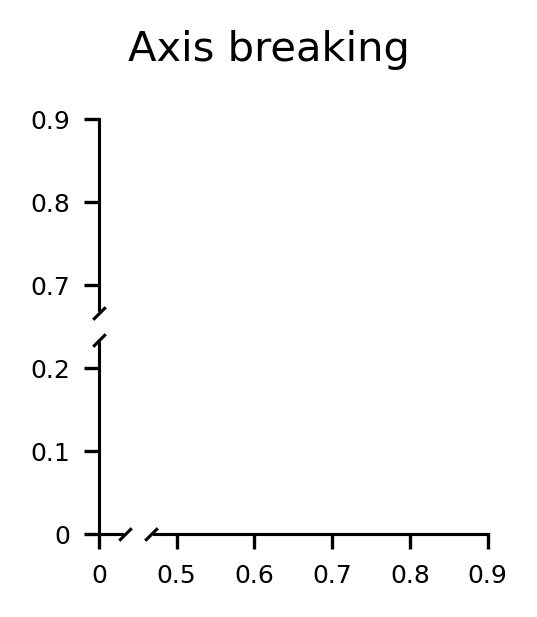

In [14]:
fig, ax = plt.subplots(1, 1, figsize=my.utilities.cm2inch(4.5, 4.5))

fig.tight_layout()
my.utilities.break_after_nth_tick(ax=ax, n=0, axis="x")
my.utilities.break_after_nth_tick(ax=ax, n=2, axis="y")

ax.set_xticklabels([0, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_yticklabels([0, 0.1, 0.2, 0.7, 0.8, 0.9])

fig.suptitle("Axis breaking", y=1.1, fontsize=10)
plt.savefig("examples/breakAxes.png", bbox_inches="tight")

# Compositing

In [15]:
from scipy.stats import ttest_ind

<function scatter at 0x7f950dd05a60>


/Users/moltaire/Desktop/myplotlib/myplotlib/plots/lm.py:51: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 14 seconds.
/Users/moltaire/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


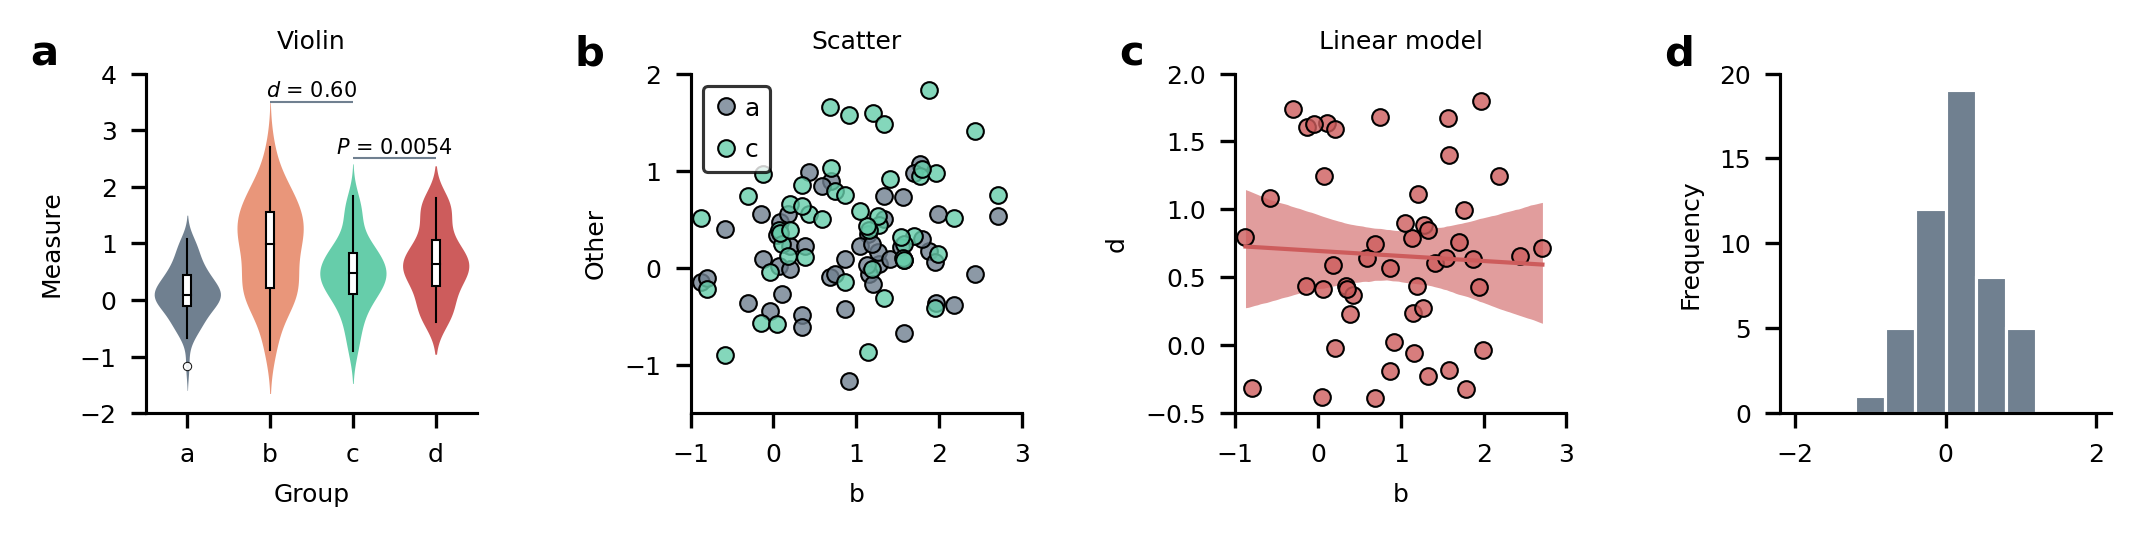

In [16]:
fig, axs = plt.subplots(1, 4, figsize=my.utilities.cm2inch(4 * 4.5, 4.5))

# Violin Plot
axs[0] = my.plots.violin(data[["a", "b", "c", "d"]], value_name="Measure", ax=axs[0])
axs[0].set_title("Violin")

# Annotations
d = np.mean(data["b"]) - np.mean(data["c"]) / np.sqrt(
    np.std(data["b"] ** 2) + np.std(data["c"] ** 2)
)
axs[0] = my.annotation.hTextLine(
    "$d$ = {d:.2f}".format(d=d), 1, 2, 3.5, ax=axs[0], lineTextGap=0.02
)

tval, pval = ttest_ind(data["c"], data["b"], equal_var=False)
if pval < 0.001:
    pstring = "$P$ < 0.001"
else:
    pstring = "$P$ = {pval:.4f}".format(pval=pval)
axs[0] = my.annotation.hTextLine(pstring, 2, 3, 2.5, lineTextGap=0.02, ax=axs[0])

axs[0].set_ylim(-2, 4)

# Scatter Plot
axs[1] = my.plots.scatter(data["b"], data["a"], label="a", ax=axs[1])
axs[1].plot([])  # skip color in cycle
axs[1] = my.plots.scatter(data["b"], data["c"], label="c", ax=axs[1])
axs[1].set_xlim(-1, 3)
axs[1].set_ylim(-1.5, 2)
axs[1].set_xlabel("b")
axs[1].set_ylabel("Other")
axs[1].legend()
axs[1].set_title("Scatter")


# LM Plot
for i in range(3):
    axs[2].plot(
        []
    )  # skip first colors so that relations of colors to variables are constant

lmout1 = my.plots.lm(data["b"], data["d"], label="d", ax=axs[2])
axs[2].set_xlabel("b")
axs[2].set_ylabel("d")
axs[2].set_xlim(-1, 3)
axs[2].set_ylim(-0.5, 2)
axs[2].set_title("Linear model")


# Histogram
axs[3] = my.plots.hist(data["a"], bins=np.linspace(-2, 2, 11))
axs[3].set_ylabel("Frequency")
axs[3].set_ylim(0, 20)

# Labelling
fig.tight_layout(w_pad=3)
my.utilities.label_axes(
    fig, fontsize=10, loc=(-0.35, 1.0), fontweight="bold", ha="left", va="bottom"
)

plt.savefig("examples/combination.png")

# Stats

## BMS

In [17]:
# Simulate model log evidences
# Higher values indicate better fit.
# (e.g., -0.5 * how I usually calculate BIC)
# Shape is (N models, K subjects)

np.random.seed(123)
n_models = 5
n_subjects = 20
ll_means = np.random.uniform(low=0, high=100, size=n_models)
ll_sds = np.random.uniform(low=5, high=20, size=n_models)
L = np.vstack(
    [
        np.random.normal(loc=ll_means[m], scale=ll_sds[m], size=n_subjects)
        for m in range(n_models)
    ]
).round(2)

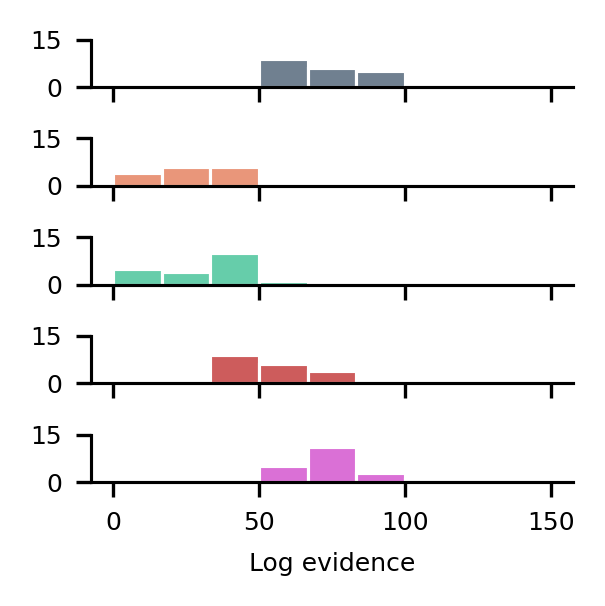

In [18]:
fig, axs = plt.subplots(n_models, 1, sharex=True, sharey=True)
for m in range(n_models):
    axs[m] = my.hist(x=L[m, :], bins=np.linspace(0, 150, 10), color=f"C{m}", ax=axs[m])
axs[-1].set_xlabel("Log evidence")
axs[-1].set_ylim(0, 15)
axs[-1].set_yticks([0, 15])
plt.tight_layout()

In [19]:
bmsResult = my.stats.bms(L=L, cores=1)

/Users/moltaire/Desktop/myplotlib/myplotlib/stats/bms.py:45: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sample_kwargs)
Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [r, alpha]
>CategoricalGibbsMetropolis: [m]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 59 seconds.
/Users/moltaire/miniconda3/lib/python3.8/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The acceptance probability does not match the target. It is 0.8897933762980538, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.67538599861275, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/Users/moltaire/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argume

In [20]:
bmsResult["summary"]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],14.065,3.991,6.750,19.972,0.154,0.119,537.0,387.0,1.01
alpha[1],2.387,2.235,0.006,6.305,0.201,0.142,106.0,179.0,1.02
alpha[2],2.125,2.020,0.009,5.637,0.087,0.062,377.0,485.0,1.01
alpha[3],2.451,2.409,0.020,7.209,0.208,0.147,157.0,121.0,1.02
alpha[4],14.900,3.795,8.046,19.937,0.239,0.195,175.0,395.0,1.01
r[0],0.420,0.086,0.265,0.585,0.004,0.003,488.0,1262.0,1.00
r[1],0.042,0.045,0.000,0.123,0.003,0.002,108.0,86.0,1.03
r[2],0.036,0.040,0.000,0.111,0.002,0.001,377.0,244.0,1.01
r[3],0.041,0.044,0.000,0.125,0.003,0.002,186.0,177.0,1.01
r[4],0.460,0.089,0.296,0.625,0.003,0.002,737.0,1003.0,1.01


In [21]:
bmsResult["xp"]

array([0.3955, 0.    , 0.    , 0.    , 0.6045])

In [22]:
bmsResult["r"]

array([0.42038706, 0.04184216, 0.03649672, 0.04111088, 0.46016318])